In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

path = "/Users/yhra/Documents/Master/Semester_3/MLFMM/UE/04/data/"


In [3]:
X = np.load(path + "X.npy")
y = np.load(path + "y.npy")

print(X.shape)
print(y.shape)


(1000, 2)
(1000,)


# Task 1.1 Visualizing the data

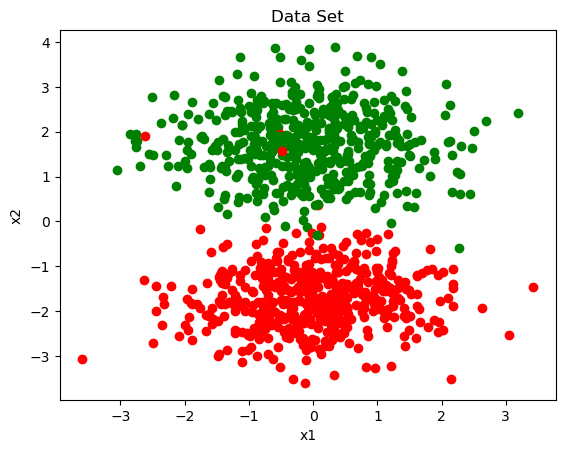

The Data is linearly seperable


In [4]:
import matplotlib.pyplot as plt

for i,x in enumerate(X):
    color = "green" if y[i] == 1 else "red"
    plt.scatter(x[0],x[1], c=color)   
plt.title("Data Set")   
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

print("The Data is linearly seperable")
# Split the data into training and testing sets once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Task 1.2 Implementing Pegasos_SGD

- train one with $\lambda= 0.0$
- train one with $\lambda= 1.0$

## Hyperparameters
- learning rate: 0.01
- number of iterations: 1000
- random seed: 42
- test size: 0.2



Training Results:
Lambda: 0.0
Number of iterations: 1000
Final learning rate: 0.001001
Final weights: [-0.79756751  3.28452266]
Final bias: 0.9121
Test accuracy: 0.9900

Training Results:
Lambda: 1.0
Number of iterations: 1000
Final learning rate: 0.001001
Final weights: [-0.02674134  0.58128173]
Final bias: 0.0269
Test accuracy: 0.9900


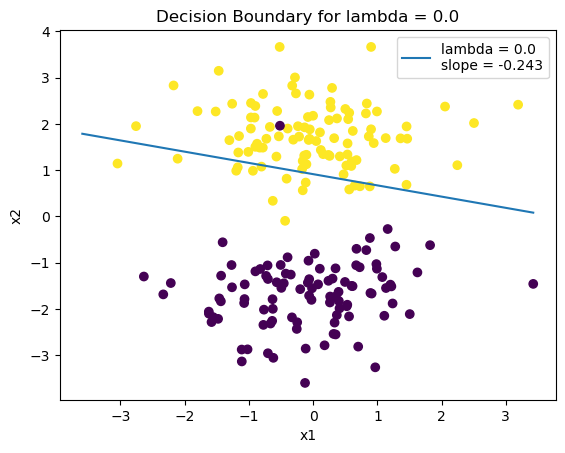

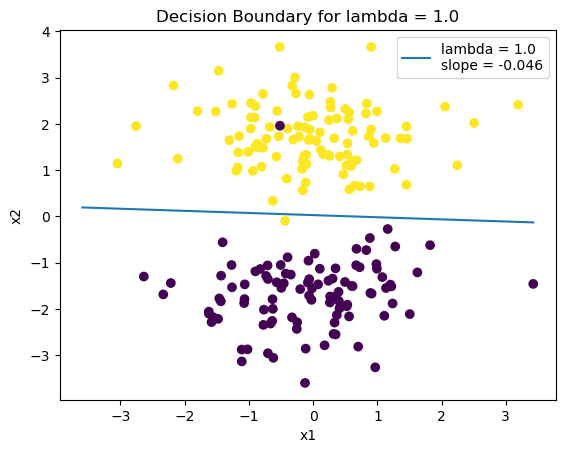

In [16]:
class Pegasos_SGD:
    def __init__(self, lr, lambda_, n_iter, rand_key = 42):
        self.lr = lr
        self.lambda_ = lambda_
        self.n_iter = n_iter
        self.rand_key = rand_key

    def split_data(self, X, y, test_size=0.2):
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=self.rand_key)

    def set_train_test(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def classify(self, x):
        return np.dot(self.w,x) + self.b
    
    def get_missclassification_rate(self):
        missclassification_rate = np.array([1 if np.sign(self.classify(x)) != y else 0 for x,y in zip(self.X_test, self.y_test)]).mean()
        self.accuracy = 1 - missclassification_rate
        return missclassification_rate
    
    def train(self, res=False):
        self.w = np.zeros(self.X_train.shape[1])
        self.b = 0
        np.random.seed(self.rand_key)
        for t in range(1,self.n_iter):
            idx = np.random.randint(0, self.X_train.shape[0])
            x = self.X_train[idx]
            y = self.y_train[idx]
            self.lr = 1/t
            if self.classify(x) * y <= 1:
                self.w = (1 - self.lr * self.lambda_) * self.w + self.lr * y * x
                self.b = self.b + self.lr * y
            else:
                self.w = (1 - self.lr * self.lambda_) * self.w

        # calculate the accuracy
        self.get_missclassification_rate()
        if res:
            print(f"\nTraining Results:")
            print(f"Lambda: {self.lambda_}")
            print(f"Number of iterations: {self.n_iter}")
            print(f"Final learning rate: {self.lr:.6f}")
            print(f"Final weights: {self.w[:2]}")
            print(f"Final bias: {self.b:.4f}")
            print(f"Test accuracy: {self.accuracy:.4f}")
        return self.w, self.b
    
    def plot_decision_boundary(self):
        x_min = X[:,0].min()
        x_max = X[:,0].max()
        linspace_x = np.linspace(x_min, x_max, 100)
        plt.scatter(self.X_test[:,0], self.X_test[:,1], c=self.y_test, cmap='viridis')
        plt.plot(linspace_x, (self.w[0]/self.w[1]*linspace_x + self.b), label=f"lambda = {self.lambda_} \nslope = {self.w[0]/self.w[1]:.3f}")
        plt.legend()
        plt.title(f"Decision Boundary for lambda = {self.lambda_}")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()

    
    
            
pegasos_0 = Pegasos_SGD(lr=1, lambda_=0.0, n_iter=1000)
pegasos_1 = Pegasos_SGD(lr=1, lambda_=1.0, n_iter=1000)

pegasos_0.set_train_test(X_train, X_test, y_train, y_test)
pegasos_1.set_train_test(X_train, X_test, y_train, y_test)

pegasos_0.train(res=True)
pegasos_1.train(res=True)

pegasos_0.plot_decision_boundary()
pegasos_1.plot_decision_boundary()



# Task 1.3 Compare with Perceptron

- Train 100 models with different random seeds
- Plot decision boundaries for each model
    - Make 2 subplots for each model: one for the perceptron and one for the pegasos_SGD with $\lambda = 1.0$




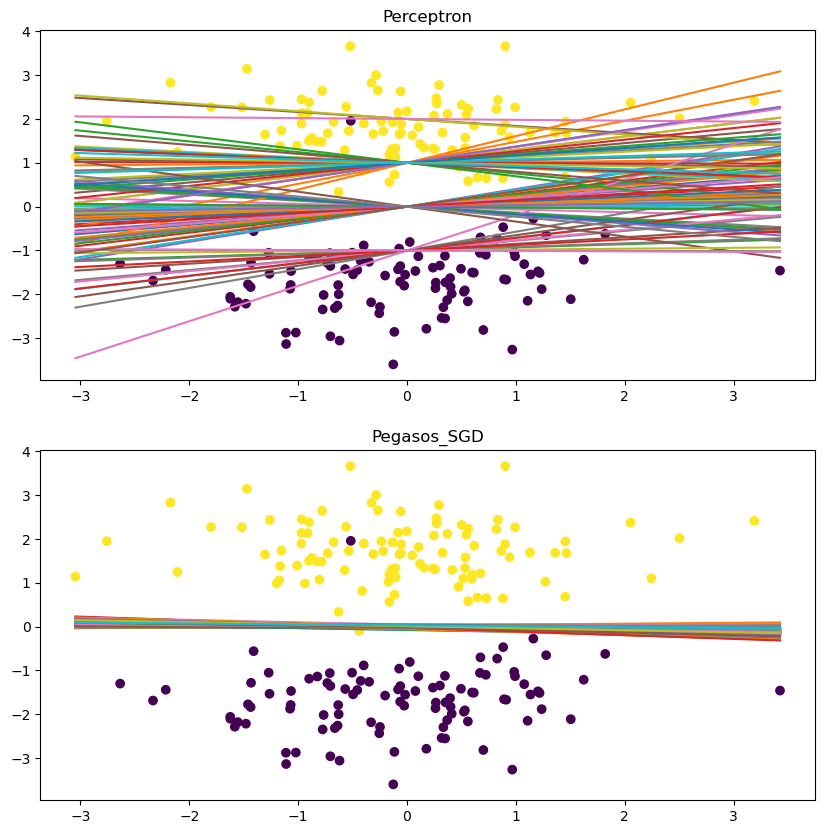

In [6]:
class Perceptron:
    def __init__(self, n_iter, rand_key = 42):
        self.n_iter = n_iter
        self.rand_key = rand_key

    def set_train_test(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def split_data(self, X, y, test_size=0.2):
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=self.rand_key)

    def classify(self, x):
        return np.dot(self.w,x) + self.b
    
    def get_accuracy(self):
        return np.array([1 if self.classify(x)*y > 0 else 0 for x,y in zip(self.X_test, self.y_test)]).mean()

    def train(self, res=False):
        self.w = np.zeros(self.X_train.shape[1])
        self.b = 0
        np.random.seed(self.rand_key)
        for t in range(1,self.n_iter+1):
            idx = np.random.randint(0, self.X_train.shape[0])
            x = self.X_train[idx]
            y = self.y_train[idx]
            if self.classify(x) * y <= 0:
                self.w = self.w + y * x
                self.b = self.b + y

        # calculate the accuracy
        self.accuracy = self.get_accuracy()
        if res:
            print(f"\nTraining Results:")
            print(f"Number of iterations: {self.n_iter}")
            print(f"Final weights: {self.w[:2]}")
            print(f"Final bias: {self.b:.4f}")
            print(f"Test accuracy: {self.accuracy:.4f}")
        return self.w, self.b
    
    def plot_decision_boundary(self):
        x_min = X[:,0].min()
        x_max = X[:,0].max()
        linspace_x = np.linspace(x_min, x_max, 100)
        plt.scatter(self.X_test[:,0], self.X_test[:,1], c=self.y_test, cmap='viridis')
        plt.plot(linspace_x, (self.w[0]/self.w[1]*linspace_x + self.b), label=f"slope = {self.w[0]/self.w[1]:.3f}")
        plt.legend()
        plt.title(f"Decision Boundary for Perceptron")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].set_title("Perceptron")
axs[1].set_title("Pegasos_SGD")
axs[0].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')
axs[1].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')
x_min = X_test[:,0].min()
x_max = X_test[:,0].max()
for i in range(100):
    perceptron = Perceptron(n_iter=1000, rand_key=i)
    perceptron.set_train_test(X_train, X_test, y_train, y_test)
    w, b = perceptron.train()
    k_perceptron = w[0]/w[1]
    linspace_x = np.linspace(x_min, x_max, 100)
    axs[0].plot(linspace_x, (k_perceptron*linspace_x + b))

    pegasos = Pegasos_SGD(lr=0.01, lambda_=1.0, n_iter=1000, rand_key=i)
    pegasos.set_train_test(X_train, X_test, y_train, y_test)
    w, b = pegasos.train()
    k_pegasos = w[0]/w[1]
    axs[1].plot(linspace_x, (k_pegasos*linspace_x + b))
    
plt.show()



# Task 1.4

## Plot Accuracy vs Lambda



In [7]:
results = []
for lambda_ in np.linspace(0,10,100):
    pegasos = Pegasos_SGD(lr=0.01, lambda_=lambda_, n_iter=1000)
    pegasos.set_train_test(X_train, X_test, y_train, y_test)
    w, b = pegasos.train()
    pegasos.get_missclassification_rate()
    results.append((lambda_, pegasos.accuracy))

# create a contour plot
lambdas = np.unique([result[0] for result in results])
accuracies = np.array([result[1] for result in results])
                      
# create a dataframe
import pandas as pd
df = pd.DataFrame(results, columns=["Lambda", "Accuracy"])
df.head()


,Lambda,Accuracy
0,0.00000,0.990
1,0.10101,0.990
2,0.20202,0.985
3,0.30303,0.990
4,0.40404,0.995


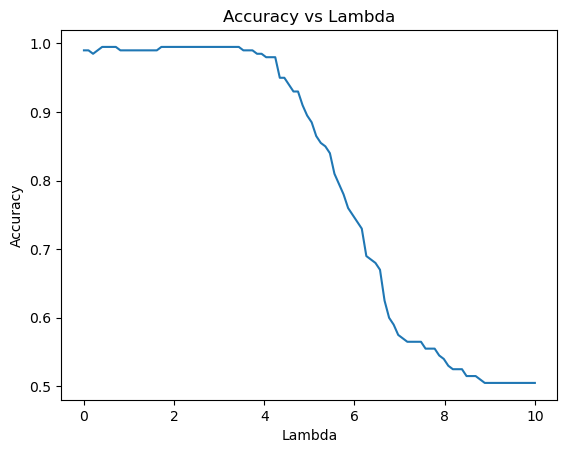

In [8]:
# plot accuracy vs lambda
plt.plot(df["Lambda"], df["Accuracy"])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.show()






# Task 2.1 VIsualize the data


(80,)
(80,)


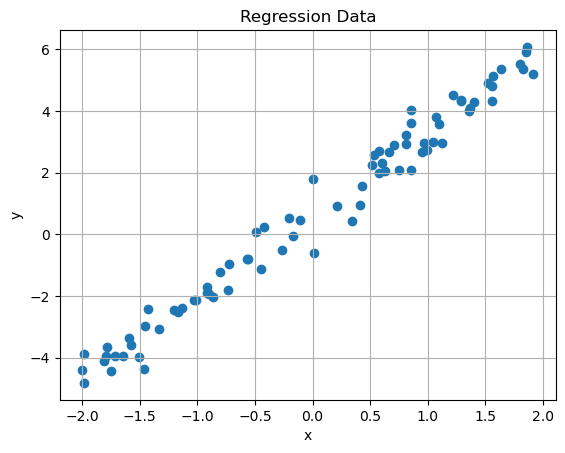

In [9]:
X_reg = np.load(path + "X_regression.npy")
y_reg = np.load(path + "y_regression.npy")

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(X_reg_train.shape)
print(y_reg_train.shape)

plt.scatter(X_reg_train, y_reg_train)   
plt.title("Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()



# Task 2.2 Use Closed Form Solution to Solve the Regression Problem

- With inverse Matrix
- $\hat{w} = (X^T X)^{-1} X^T y$

X_reg_phi.T.shape: (2, 80)
c.shape: (2,)
A.shape: (2, 2)
w.shape: (2,)
The weights are w = 2.657 and b = 0.636


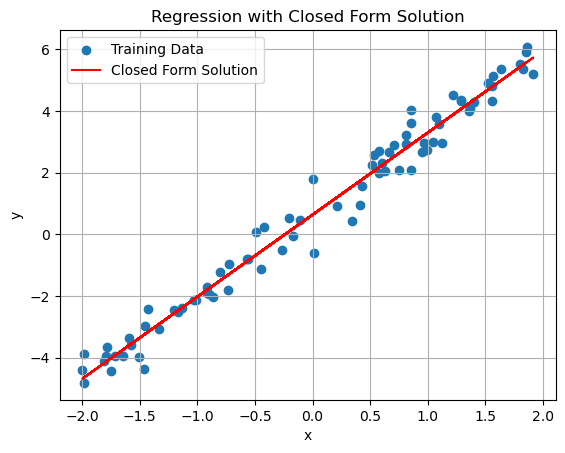

In [10]:
def phi(x):
    """
    phi(x) = [x,1]
    """
    return np.array([x,1])

X_reg_phi_train = np.array([phi(x) for x in X_reg_train])
print(f"X_reg_phi.T.shape: {X_reg_phi_train.T.shape}")

c = np.dot(X_reg_phi_train.T, y_reg_train)
print(f"c.shape: {c.shape}")

A = np.dot(X_reg_phi_train.T, X_reg_phi_train)
print(f"A.shape: {A.shape}")

w_closed = np.dot(np.linalg.inv(A), c)
print(f"w.shape: {w_closed.shape}")

print(f"The weights are w = {w_closed[0]:.3f} and b = {w_closed[1]:.3f}")

# Plot the data and the regression line
plt.scatter(X_reg_train, y_reg_train, label="Training Data")
plt.plot(X_reg_train, np.dot(X_reg_phi_train, w_closed), label="Closed Form Solution", color="red")
plt.legend()
plt.title("Regression with Closed Form Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()




Task 2.3 Quantify Error

- MSE and mean absolute error on the test set


In [11]:
x_reg_test_phi = np.array([phi(x) for x in X_reg_test])
y_reg_pred = np.dot(x_reg_test_phi, w_closed)

mse_closed = np.mean((y_reg_pred - y_reg_test)**2)
mae_closed = np.mean(np.abs(y_reg_pred - y_reg_test))

print(f"MSE: {mse_closed:.3f}")
print(f"MAE: {mae_closed:.3f}")


MSE: 0.268
MAE: 0.399


# Task 2.4 Histogram of the Residuals

- Use entire dataset

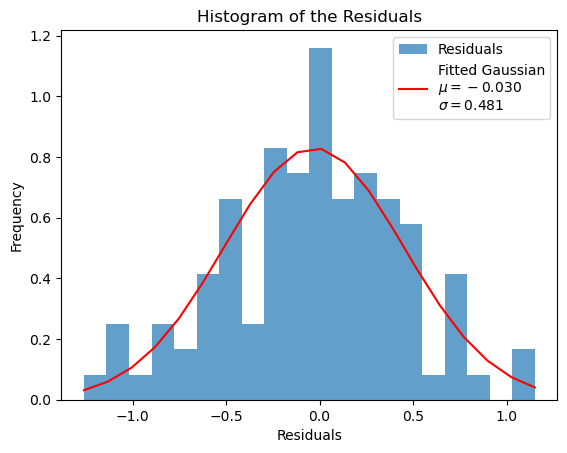

In [22]:
x_reg_phi = np.array([phi(x) for x in X_reg])
y_reg_pred = np.dot(x_reg_phi, w_closed)
residuals = y_reg - y_reg_pred

# fit a gaussian distribution to the residuals
from scipy.stats import norm
mu, sigma = norm.fit(residuals)
bins = np.linspace(min(residuals), max(residuals), 20)
plt.hist(residuals, bins=20, density=True, alpha=0.7, label="Residuals")
plt.plot(bins, norm.pdf(bins, mu, sigma), 'r-', 
         label=f"Fitted Gaussian\n$\\mu={mu:.3f}$\n$\\sigma={sigma:.3f}$")
plt.title("Histogram of the Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Linear Regression Stochastic Gradient Descent

- implement a class for the linear regression with stochastic gradient descent

In [13]:
class LinearRegressionSGD:
    def __init__(self, n_iter, rand_key = 42):
        self.n_iter = n_iter
        self.rand_key = rand_key
        self.lr = 0.01
        self.params_hist = []

    def set_train_test(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def classify(self, x):
        return np.dot(self.w, x) + self.b

    def split_data(self, X, y, test_size=0.2):
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=self.rand_key)

    def train(self, res=False):
        self.w = np.zeros_like(self.X_train[0])
        self.b = 0
        self.params_hist.append(np.array([self.w, self.b]))
        np.random.seed(self.rand_key)
        for t in range(self.n_iter):
            self.lr = 1/(t+1)
            idx = np.random.randint(0, self.X_train.shape[0])
            x = self.X_train[idx]
            y = self.y_train[idx]
            self.w = self.w + self.lr * (y - self.classify(x)) * x
            self.b = self.b + self.lr * (y - self.classify(x))
            self.params_hist.append(np.array([self.w, self.b]))
        if res:
            print(f"\nTraining Results:")
            print(f"Number of iterations: {self.n_iter}")
            print(f"Final weights: {self.w}")
            print(f"Final bias: {self.b:.4f}")
            print(f"MSE of test set: {self.get_mse(data='test'):.4f}")
            print(f"MSE of train set: {self.get_mse(data='train'):.4f}")
            print(f"MSE of all data: {self.get_mse(data='all'):.4f}")

        return self.w, self.b
    
    def get_mse(self, data="test"):
        if data=="test":
            y_pred = np.dot(self.X_test, self.w) + self.b
            return np.mean((y_pred - self.y_test)**2)
        elif data=="train":
            y_pred = np.dot(self.X_train, self.w) + self.b
            return np.mean((y_pred - self.y_train)**2)
        elif data=="all":
            y_pred = np.dot(np.concatenate((self.X_train, self.X_test)), self.w) + self.b
            return np.mean((y_pred - np.concatenate((self.y_train, self.y_test)))**2)
        
    
    def get_mae(self, data="test"):
        if data=="test":
            y_pred = np.dot(self.X_test, self.w) + self.b
            return np.mean(np.abs(y_pred - self.y_test))
        elif data=="train":
            y_pred = np.dot(self.X_train, self.w) + self.b
            return np.mean(np.abs(y_pred - self.y_train))
        elif data=="all":
            y_pred = np.dot(np.concatenate((self.X_train, self.X_test)), self.w) + self.b
            return np.mean(np.abs(y_pred - np.concatenate((self.y_train, self.y_test))))



        

- Train 100 Models and use the random seed [0,1,...,99] for 100 Steps
- Plot the trained linear regressions and the closed form solution on the same plot

- Get the MSE and MAE for each Models and plot them in a histogram
- Draw vertical lines for the MSE and MAE of the closed form solution

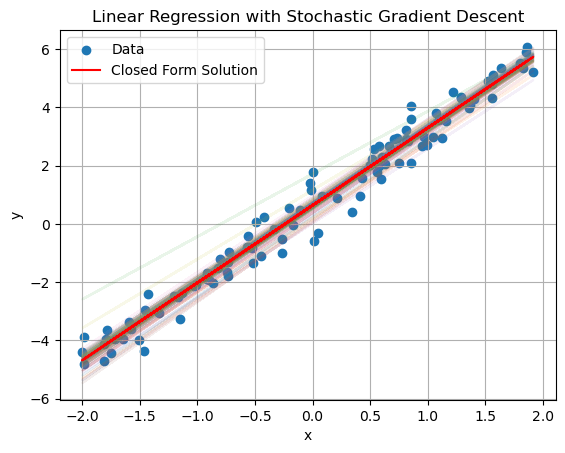

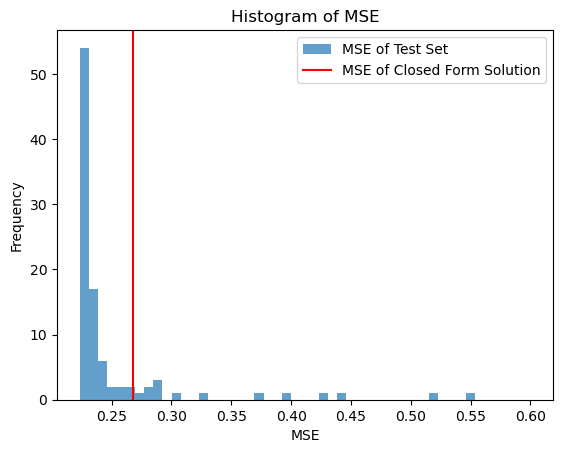

In [20]:
params_bin = []
mse_bin  = []
for i in range(100):
    LR = LinearRegressionSGD(n_iter=100, rand_key=i)
    LR.set_train_test(X_reg_train, X_reg_test, y_reg_train, y_reg_test)
    w, b = LR.train(res=False)
    params_bin.append(np.array([w, b]))
    y_pred = np.dot(np.array([phi(x) for x in LR.X_test]), params_bin[-1])
    mse_bin.append(LR.get_mse(data="train"))

plt.scatter(X_reg, y_reg, label="Data")
for i in range(100):
    plt.plot(X_reg, np.dot(np.array([phi(x) for x in X_reg]), params_bin[i]), alpha=0.1)
plt.plot(X_reg, np.dot(np.array([phi(x) for x in X_reg]), w_closed), label="Closed Form Solution", color="red")
plt.legend()
plt.title("Linear Regression with Stochastic Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

bins = np.linspace(min(mse_bin), 0.6, 50)
plt.hist(mse_bin, bins=bins, density=False, alpha=0.7, label="MSE of Test Set")
plt.axvline(mse_closed, color="red", label="MSE of Closed Form Solution")
plt.title("Histogram of MSE")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()




# Task 2.7 

- Train a single model with 100 iterations
- Store the parameters at every step in a list
- compute the mse for test and training set at every step
- plot the mse for test and training set against the iteration steps



Training Results:
Number of iterations: 100
Final weights: 2.641940408077858
Final bias: 0.7095
MSE of test set: 0.2987
MSE of train set: 0.2289
MSE of all data: 0.2429


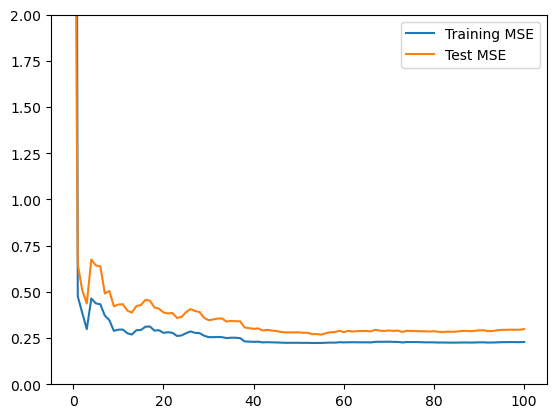

In [15]:
LR = LinearRegressionSGD(n_iter=100, rand_key=1)
LR.set_train_test(X_reg_train, X_reg_test, y_reg_train, y_reg_test)
w, b = LR.train(res=True)


# compute the mse for test and training set at every step
mse_test = []
mse_train = []
for i in range(len(LR.params_hist)):
    params = LR.params_hist[i]
    y_pred_test = np.dot(np.array([phi(x) for x in LR.X_test]), params)
    y_pred_train = np.dot(np.array([phi(x) for x in LR.X_train]), params)
    mse_test.append(np.mean((LR.y_test - y_pred_test)**2))
    mse_train.append(np.mean((LR.y_train - y_pred_train)**2))

# plot the mse for test and training set against the iteration steps
plt.ylim(0, 2)
plt.plot(np.arange(len(mse_train)), mse_train, label="Training MSE")
plt.plot(np.arange(len(mse_test)), mse_test, label="Test MSE")
plt.legend()
plt.show()